In [4]:
import altair as alt
import pandas as pd

In [5]:
temp = pd.read_csv('temps.tsv', sep='\t', usecols=range(0,2), names=['year', 'val'])
# convert years into datetime
temp['year'] = pd.to_datetime(temp['year'], format='%Y')
# create column of inverted values for the inverted overlay
temp['negval'] = temp['val'].apply(lambda x: x * -1)

In [6]:
width, height = 800, 50

In [7]:
# define layered areas for positive values
area1 = alt.Chart().mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('year(year):T', title=None),
    alt.Y('val:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#FFFFAF'),
    opacity=alt.value(0.35)
).properties(
    width=width,
    height=height
)
area2 = area1.encode(
    alt.Y('val2:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#FFE37E')
).transform_calculate(
    "val2", alt.datum.val - 0.2
)

area3 = area1.encode(
    alt.Y('val3:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#FFB14E')
).transform_calculate(
    "val3", alt.datum.val - 0.4
)

area4 = area1.encode(
    alt.Y('val4:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#C8811C')
).transform_calculate(
    "val4", alt.datum.val - 0.6
)

area5 = area1.encode(
    alt.Y('val5:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#925500')
).transform_calculate(
    "val5", alt.datum.val - 0.8
)

# layer areas for each chart
posvals = []
for num in range(6):
    posvals.append(alt.layer(area1, area2, area3, area4, area5, data=temp[num*23:(num+1)*23]))

In [8]:
# define layered areas for negative (inverted) values
area1 = alt.Chart().mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('year(year):T', title= None),
    alt.Y('negval:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#DD9EDA'),
    opacity=alt.value(0.35)
).properties(
    width=width,
    height=height
)
area2 = area1.encode(
    alt.Y('val2:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#BD6ED5')
).transform_calculate(
    "val2", alt.datum.negval - 0.2
)

area3 = area1.encode(
    alt.Y('val3:Q', scale=alt.Scale(domain=[0, 0.2]), title=None),
    color=alt.value('#8C3EAE')
).transform_calculate(
    "val3", alt.datum.negval - 0.4
)

# define chart rows and layer area definitions
negvals = []
for num in range(6):
    negvals.append(alt.layer(area1, area2, area3, data=temp[num*23:(num+1)*23]))

In [9]:
# layer positive chart rows 
final = [alt.layer(pos, neg) for pos, neg in zip (posvals, negvals)]

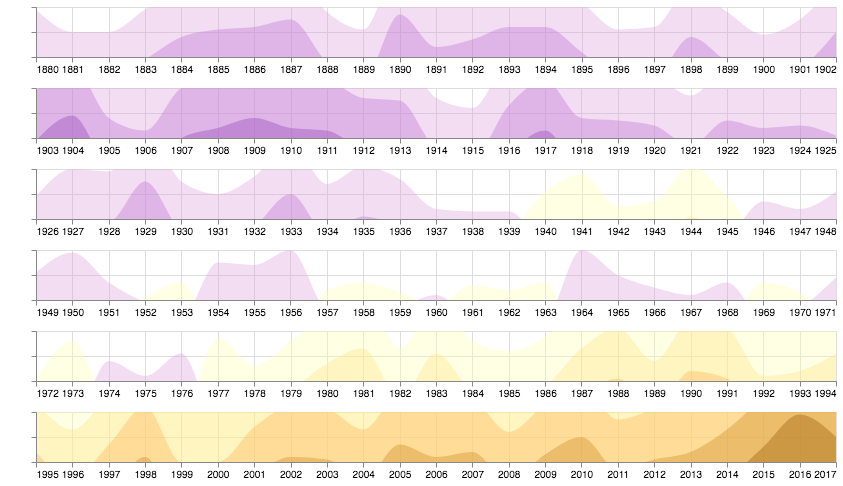

In [10]:
alt.vconcat(*final).configure_axisY(labels=False)